# Business Problem

Problem Context
Predict the number of offenses for a given precinct within the next three months,based on historical crime data of the New York Police Department (NYPD) by using Negative Binomial Regression

Content
The dataset covers the data of all crimes reported to the New York Police Department from 2006 to the end of last year i.e.,2019. This is a large dataset consisting of 6.98 million records with 35 attributes.Given, the large size, we could filter data to a more manageable size and per our project requirement.

####Features#####

	#cmplnt_num        - randomly generated complaint number              
	#cmplnt_fr_dt      - exact date of crime occurance         
	#cmplnt_fr_tm      - exact time of crime occurance          
	#addr_pct_cd       - precinct in which the incident occured                  
	#ofns_desc         - Offense description                           
	#crm_atpt_cptd_cd  - Indicator of whether crime was successfully completed or attempted    
	#law_cat_cd        - Level of offense: felony, misdemeanor, violation     
	#boro_nm           - The name of the borough in which the incident occurred       
	#loc_of_occur_desc - Location of crime occurence      
	#prem_typ_desc     - Description of premises    
	#juris_desc        - Description of jurisdiction code   
	#jurisdiction_code - Jurisdiction responsible for incident.   
	#susp_age_group    - Suspect’s Age Group   
	#susp_race         - Suspect’s Race Description    
	#susp_sex          - Suspect’s Sex Description    
	#patrol_boro       - Name of the patrol borough in which crime occurred   
	#vic_age_group     - Victim’s Age Group      
	#vic_race          - Victim's Race Description    
	#vic_sex           - Victim's Sex Description      
	#cmplnt_to_dt      - End Date of Crime Occurence  
	#cmplnt_to_tm      - End Time of Crime Occurence

In [1]:
import sklearn

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt

In [5]:
from matplotlib.colors import ListedColormap

In [6]:
from sklearn.preprocessing import LabelEncoder


In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install sodapy

# Data Preparation

In [9]:
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("qgea-i56i", limit=10000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [10]:
results_df.describe()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,crm_atpt_cptd_cd,...,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,cmplnt_to_dt,cmplnt_to_tm,parks_nm,transit_district,station_name
count,10000,10000,10000,10000,10000,10000,9974,9990,9990,10000,...,9933,9964,9964,9964,9964,8014,8017,3700,216,216
unique,10000,2310,979,77,2262,53,46,230,223,2,...,188,68,5,51,77,2223,1137,48,12,120
top,652673693,2012-10-21T00:00:00.000,12:00:00,75,2015-07-23T00:00:00.000,341,PETIT LARCENY,638,"HARASSMENT,SUBD 3,4,5",COMPLETED,...,17614,41,2,10,47,2016-02-27T00:00:00.000,12:00:00,NA,4,125 STREET
freq,1,13,263,314,14,1744,1744,868,868,9818,...,190,328,2920,467,313,11,143,3640,39,13


In [11]:
results_df.isnull().sum()

cmplnt_num                        0
cmplnt_fr_dt                      0
cmplnt_fr_tm                      0
addr_pct_cd                       0
rpt_dt                            0
ky_cd                             0
ofns_desc                        26
pd_cd                            10
pd_desc                          10
crm_atpt_cptd_cd                  0
law_cat_cd                        0
boro_nm                          10
loc_of_occur_desc              2059
prem_typ_desc                    42
juris_desc                        0
jurisdiction_code                10
hadevelopt                     9444
housing_psa                      42
x_coord_cd                       35
y_coord_cd                       35
susp_age_group                 6155
susp_race                      4301
susp_sex                       4301
latitude                         35
longitude                        35
lat_lon                          35
patrol_boro                      10
vic_age_group               

# Data Transformation

In [12]:
df3 = results_df.drop(['lat_lon', 'parks_nm', 'transit_district', 'station_name','hadevelopt','housing_psa',':@computed_region_efsh_h5xi',':@computed_region_f5dn_yrer',':@computed_region_yeji_bk3q',':@computed_region_92fq_4b7q',':@computed_region_sbqj_enih'],axis=1)

In [13]:
df3.describe()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,crm_atpt_cptd_cd,...,susp_race,susp_sex,latitude,longitude,patrol_boro,vic_age_group,vic_race,vic_sex,cmplnt_to_dt,cmplnt_to_tm
count,10000,10000,10000,10000,10000,10000,9974,9990,9990,10000,...,5699,5699,9965,9965,9990,7932,10000,10000,8014,8017
unique,10000,2310,979,77,2262,53,46,230,223,2,...,7,3,7803,7803,8,6,7,4,2223,1137
top,652673693,2012-10-21T00:00:00.000,12:00:00,75,2015-07-23T00:00:00.000,341,PETIT LARCENY,638,"HARASSMENT,SUBD 3,4,5",COMPLETED,...,BLACK,M,40.791151867,-73.884371919,PATROL BORO BRONX,25-44,UNKNOWN,F,2016-02-27T00:00:00.000,12:00:00
freq,1,13,263,314,14,1744,1744,868,868,9818,...,2117,3550,25,25,2241,3263,3302,3993,11,143


In [14]:
df3.shape

(10000, 29)

In [15]:
df3.describe()

,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,crm_atpt_cptd_cd,...,susp_race,susp_sex,latitude,longitude,patrol_boro,vic_age_group,vic_race,vic_sex,cmplnt_to_dt,cmplnt_to_tm
count,10000,10000,10000,10000,10000,10000,9974,9990,9990,10000,...,5699,5699,9965,9965,9990,7932,10000,10000,8014,8017
unique,10000,2310,979,77,2262,53,46,230,223,2,...,7,3,7803,7803,8,6,7,4,2223,1137
top,652673693,2012-10-21T00:00:00.000,12:00:00,75,2015-07-23T00:00:00.000,341,PETIT LARCENY,638,"HARASSMENT,SUBD 3,4,5",COMPLETED,...,BLACK,M,40.791151867,-73.884371919,PATROL BORO BRONX,25-44,UNKNOWN,F,2016-02-27T00:00:00.000,12:00:00
freq,1,13,263,314,14,1744,1744,868,868,9818,...,2117,3550,25,25,2241,3263,3302,3993,11,143


In [16]:
df3['cmplnt_to_dt'] = pd.to_datetime(df3['cmplnt_to_dt'])
df3['cmplnt_to_tm'] = pd.to_datetime(df3['cmplnt_to_tm'])
df3['cmplnt_fr_dt'] = pd.to_datetime(df3['cmplnt_fr_dt'])
df3['cmplnt_fr_tm'] = pd.to_datetime(df3['cmplnt_fr_tm'])

In [17]:
df3['year_of_occurance'] = pd.DatetimeIndex(df3['cmplnt_fr_dt']).year
df3['month_of_occurance'] = pd.DatetimeIndex(df3['cmplnt_fr_dt']).month
df3['cmplnt_end_year'] = pd.DatetimeIndex(df3['cmplnt_to_dt']).year
df3['cmplnt_end_month'] = pd.DatetimeIndex(df3['cmplnt_to_dt']).month

In [18]:
df3['cmplnt_num'] = df3['cmplnt_num'].astype(int)

In [19]:
for column in df3.columns:
    if df3[column].dtype == type(object):
          df3[column] = df3[column].astype('category')

In [20]:
df3['latitude'] = df3['latitude'].astype(object)

In [21]:
df3['longitude'] = df3['longitude'].astype(object)

In [22]:
df3['x_coord_cd'] = df3['x_coord_cd'].astype(object)

In [23]:
df3['y_coord_cd'] = df3['y_coord_cd'].astype(object)

In [24]:
df3['rpt_dt'] = df3['rpt_dt'].fillna(value=df3["rpt_dt"].mode())

In [25]:
df3['ofns_desc'].fillna(df3['ofns_desc'].mode()[0], inplace=True)

In [26]:
df3['ky_cd'].fillna(df3['ky_cd'].mode()[0], inplace=True)

In [27]:
df3['pd_cd'].fillna(df3['pd_cd'].mode()[0], inplace=True)

In [28]:
df3['jurisdiction_code'].fillna(df3['jurisdiction_code'].mode()[0], inplace=True)

In [29]:
df3['pd_desc'].fillna(df3['pd_desc'].mode()[0], inplace=True)

In [30]:
df3['boro_nm'].fillna(df3['boro_nm'].mode()[0], inplace=True)

In [31]:
df3['loc_of_occur_desc'].fillna(df3['loc_of_occur_desc'].mode()[0], inplace=True)

In [32]:
df3['prem_typ_desc'].fillna(df3['prem_typ_desc'].mode()[0], inplace=True)

In [33]:
df3['susp_age_group'].fillna(df3['susp_age_group'].mode()[0], inplace=True)

In [34]:
df3['susp_race'].fillna(df3['susp_race'].mode()[0], inplace=True)

In [35]:
df3['susp_sex'].fillna(df3['susp_sex'].mode()[0], inplace=True)

In [36]:
df3['patrol_boro'].fillna(df3['patrol_boro'].mode()[0], inplace=True)

In [37]:
df3['vic_age_group'].fillna(df3['vic_age_group'].mode()[0], inplace=True)

In [38]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df3['temp'] = labelencoder.fit_transform(df3['addr_pct_cd'])
print(df3)

      cmplnt_num cmplnt_fr_dt        cmplnt_fr_tm addr_pct_cd  \
0      325341655   2015-02-11 2020-10-26 15:00:00          73   
1      393816841   2012-03-17 2020-10-26 10:30:00          69   
2      802896158   2016-10-27 2020-10-26 13:48:00          71   
3      633812343   2014-11-27 2020-10-26 19:00:00         112   
4      300349533   2013-12-11 2020-10-26 13:30:00          24   
...          ...          ...                 ...         ...   
9995   671099407   2016-03-19 2020-10-26 01:45:00         109   
9996   441666510   2016-11-18 2020-10-26 03:10:00           9   
9997   868855410   2012-06-23 2020-10-26 22:00:00         120   
9998   805725411   2014-11-10 2020-10-26 13:20:00          42   
9999   770733426   2014-03-24 2020-10-26 12:00:00         112   

                       rpt_dt ky_cd                       ofns_desc pd_cd  \
0     2015-02-11T00:00:00.000   359  OFFENSES AGAINST PUBLIC ADMINI   749   
1     2012-03-17T00:00:00.000   344    ASSAULT 3 & RELATED OFFENS

In [39]:
df3['frequency'] = df3.groupby('temp').size()

In [40]:
df3.dtypes

cmplnt_num                     int32
cmplnt_fr_dt          datetime64[ns]
cmplnt_fr_tm          datetime64[ns]
addr_pct_cd                 category
rpt_dt                      category
ky_cd                       category
ofns_desc                   category
pd_cd                       category
pd_desc                     category
crm_atpt_cptd_cd            category
law_cat_cd                  category
boro_nm                     category
loc_of_occur_desc           category
prem_typ_desc               category
juris_desc                  category
jurisdiction_code           category
x_coord_cd                    object
y_coord_cd                    object
susp_age_group              category
susp_race                   category
susp_sex                    category
latitude                      object
longitude                     object
patrol_boro                 category
vic_age_group               category
vic_race                    category
vic_sex                     category
c

In [41]:
df3.shape

(10000, 35)

In [42]:
df3.isnull().sum()

cmplnt_num               0
cmplnt_fr_dt             0
cmplnt_fr_tm             0
addr_pct_cd              0
rpt_dt                   0
ky_cd                    0
ofns_desc                0
pd_cd                    0
pd_desc                  0
crm_atpt_cptd_cd         0
law_cat_cd               0
boro_nm                  0
loc_of_occur_desc        0
prem_typ_desc            0
juris_desc               0
jurisdiction_code        0
x_coord_cd              35
y_coord_cd              35
susp_age_group           0
susp_race                0
susp_sex                 0
latitude                35
longitude               35
patrol_boro              0
vic_age_group            0
vic_race                 0
vic_sex                  0
cmplnt_to_dt          1986
cmplnt_to_tm          1983
year_of_occurance        0
month_of_occurance       0
cmplnt_end_year       1986
cmplnt_end_month      1986
temp                     0
frequency             9923
dtype: int64

# Visualizing Numerical Features

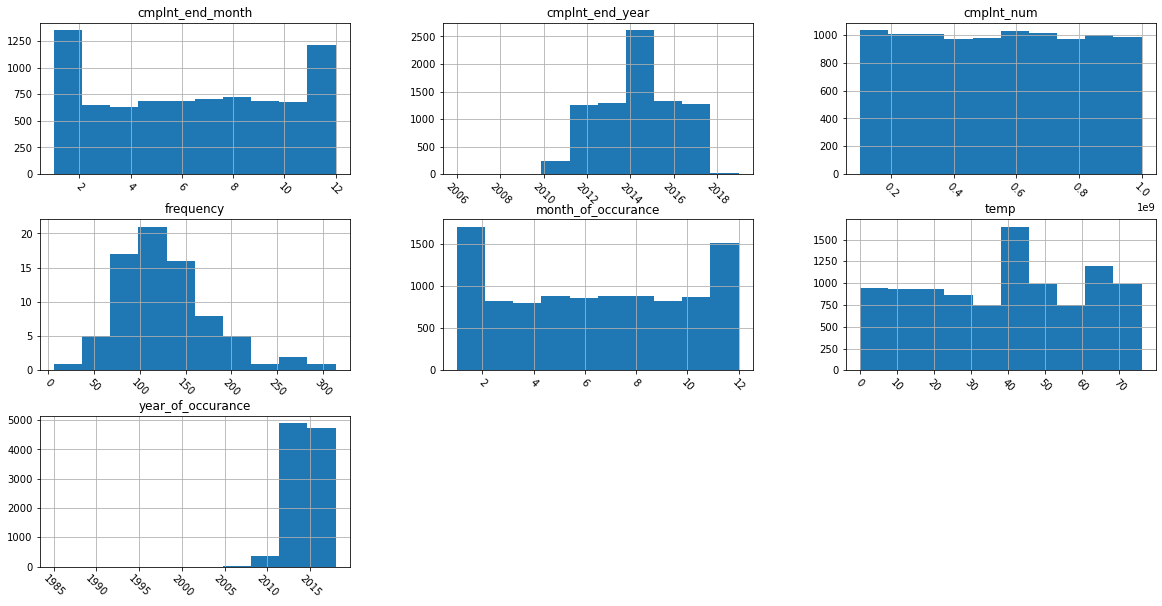

In [43]:
df3.hist(figsize=(20,10), xrot=-45, bins=10) 
## Display the labels rotated by 45 degress
# Clear the text "residue"
plt.show()

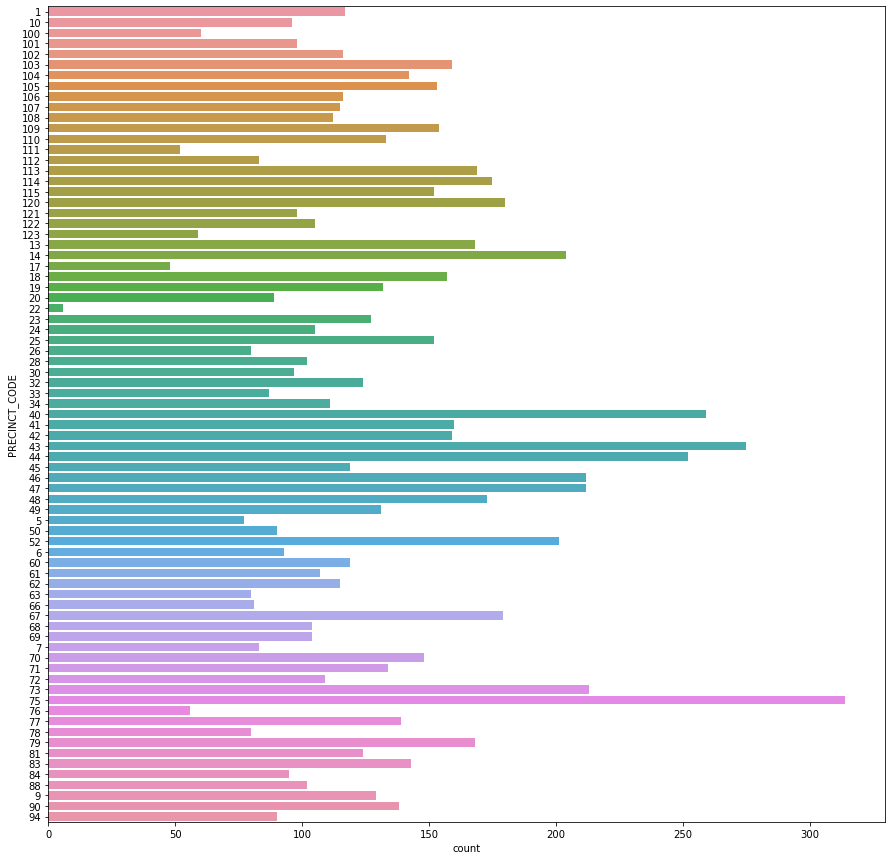

In [44]:
plt.figure(figsize=(15,15))
ax = sns.countplot(y='addr_pct_cd', data=df3)
ax.set(ylabel="PRECINCT_CODE")
plt.rcParams["axes.labelsize"] = 25


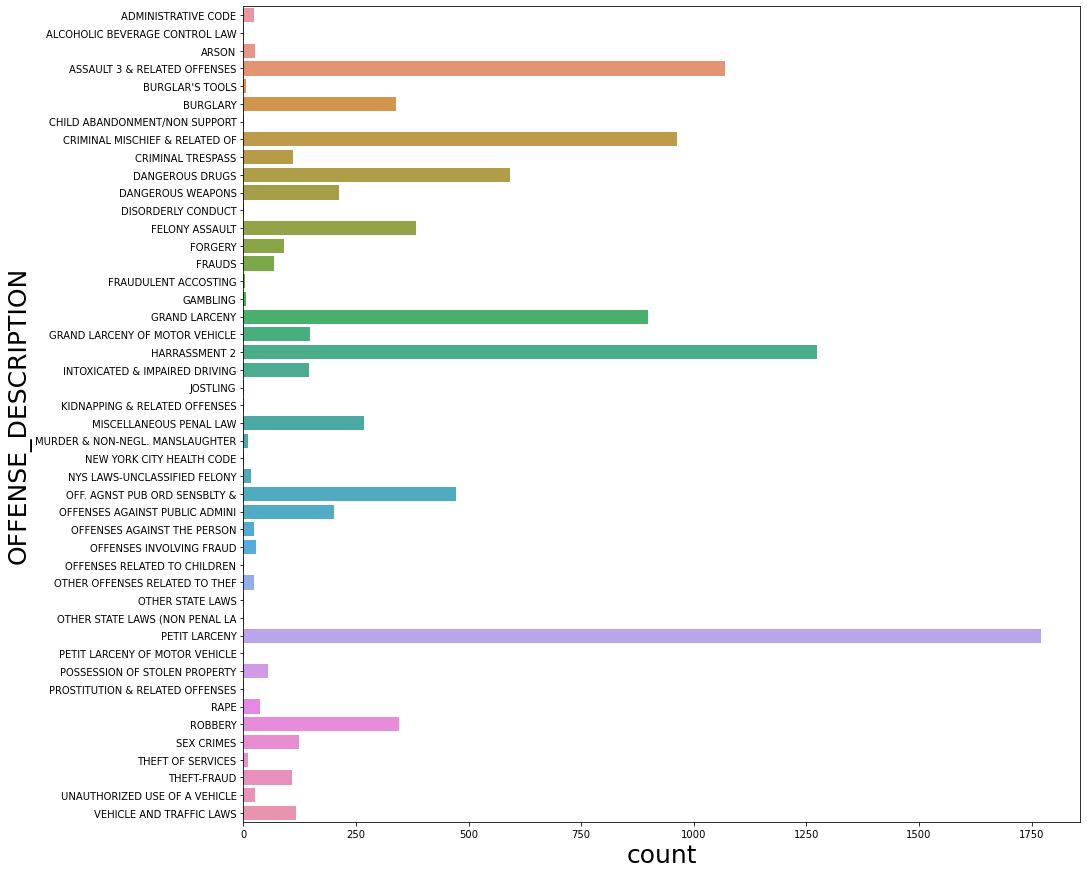

In [45]:
plt.figure(figsize=(15,15))
ax = sns.countplot(y='ofns_desc', data=df3)
ax.set(ylabel="OFFENSE_DESCRIPTION")
plt.rcParams["axes.labelsize"] = 25

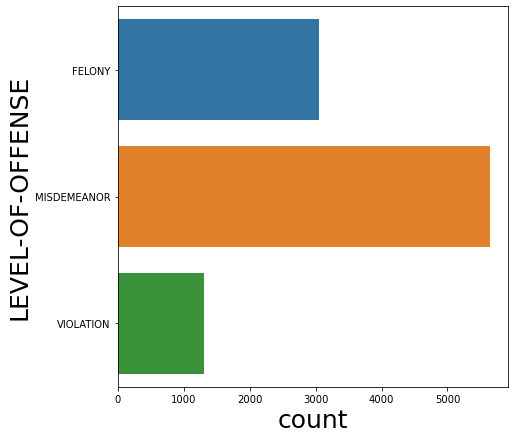

In [46]:
plt.figure(figsize=(7,7))
ax = sns.countplot(y='law_cat_cd', data=df3)
ax.set(ylabel="LEVEL-OF-OFFENSE")
plt.rcParams["axes.labelsize"] = 18

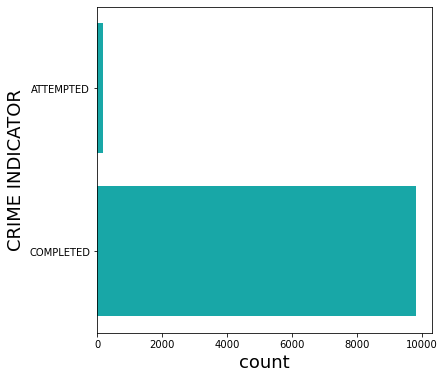

In [47]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(y="crm_atpt_cptd_cd", data=df3, color="c")
ax.set(ylabel="CRIME INDICATOR")
plt.rcParams["axes.labelsize"] = 15

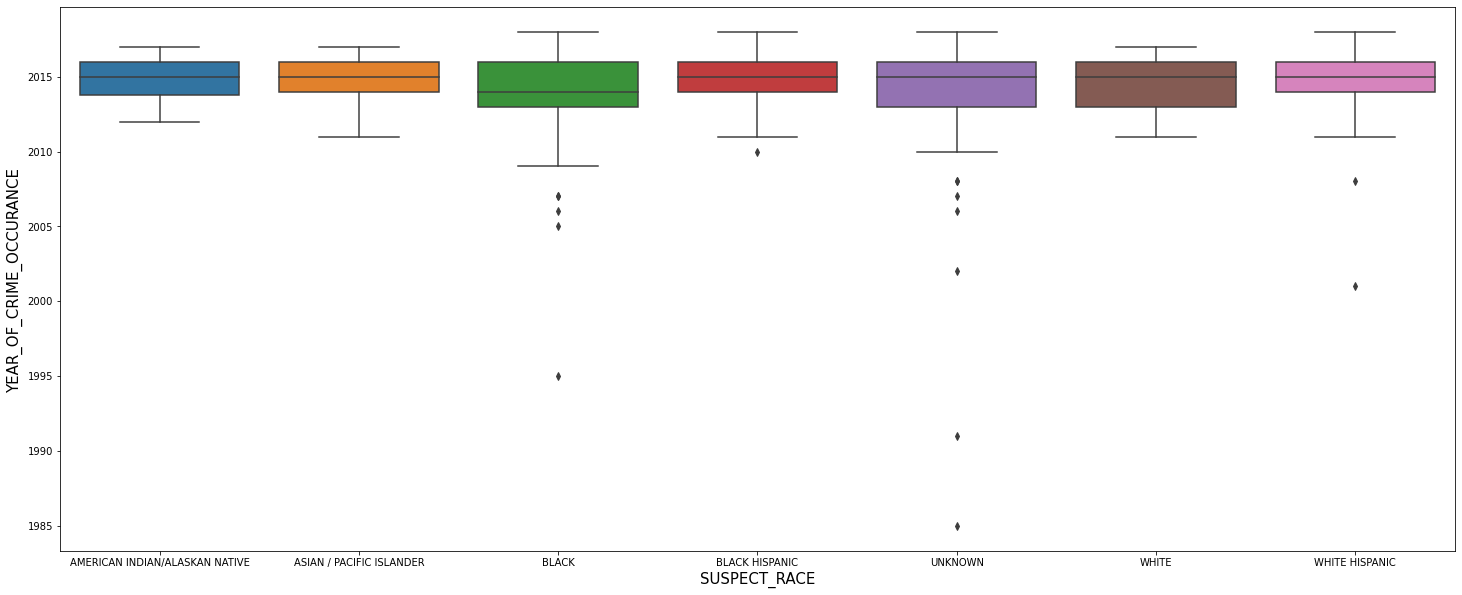

In [48]:
plt.figure(figsize=(25, 10))
ax = sns.boxplot(data=df3, y="year_of_occurance", x="susp_race")
ax.set(xlabel = "SUSPECT_RACE",ylabel="YEAR_OF_CRIME_OCCURANCE")
plt.rcParams["axes.labelsize"] = 35

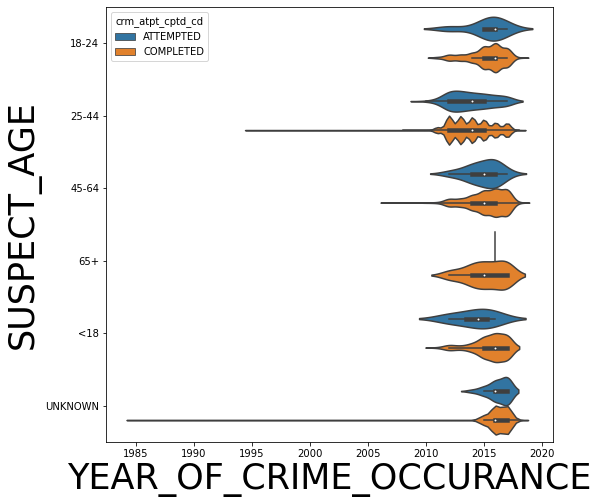

In [49]:
plt.figure(figsize=(8, 8))
ax=sns.violinplot(data=df3, y="susp_age_group", x="year_of_occurance",hue="crm_atpt_cptd_cd")
ax.set(ylabel = "SUSPECT_AGE",xlabel="YEAR_OF_CRIME_OCCURANCE")
plt.rcParams["axes.labelsize"] = 20

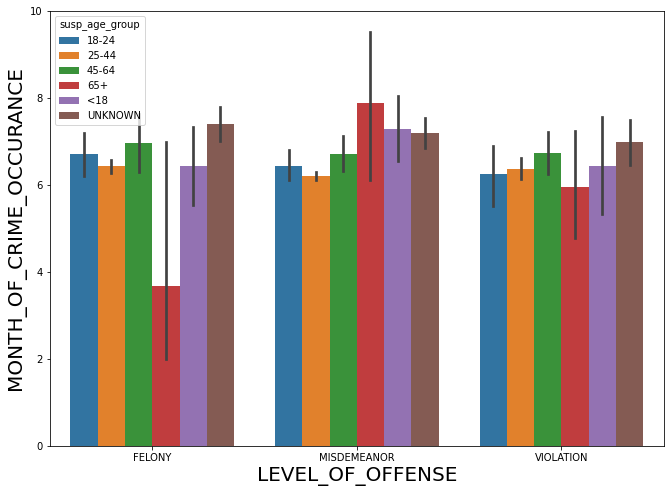

In [50]:
plt.figure(figsize=(11, 8))
ax=sns.barplot(data = df3, x="law_cat_cd", y = "month_of_occurance", hue="susp_age_group")
ax.set(xlabel="LEVEL_OF_OFFENSE",ylabel="MONTH_OF_CRIME_OCCURANCE")
plt.rcParams["axes.labelsize"] = 20

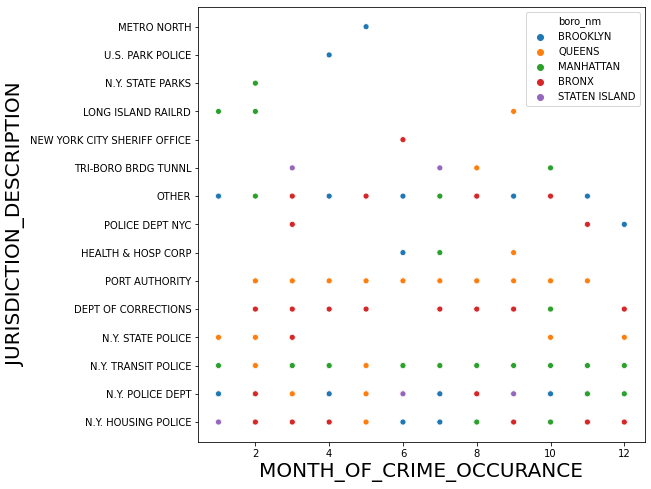

In [51]:
plt.figure(figsize=(8, 8))
ax=sns.scatterplot(data=df3, x="month_of_occurance", y="juris_desc",hue="boro_nm")
ax.set(ylabel="JURISDICTION_DESCRIPTION",xlabel="MONTH_OF_CRIME_OCCURANCE")
plt.rcParams["axes.labelsize"] = 20


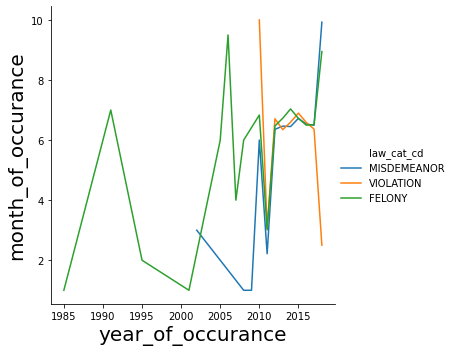

In [52]:
sns.relplot(x="year_of_occurance", y="month_of_occurance", ci=None, kind="line", hue = "law_cat_cd",data=df3);

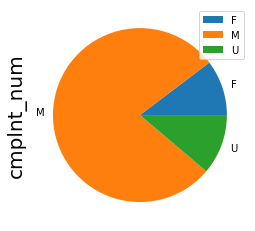

In [53]:
df3.groupby('susp_sex').count().plot.pie(y='cmplnt_num')

In [54]:
df4 = df3.copy()

In [55]:
df4.dtypes


cmplnt_num                     int32
cmplnt_fr_dt          datetime64[ns]
cmplnt_fr_tm          datetime64[ns]
addr_pct_cd                 category
rpt_dt                      category
ky_cd                       category
ofns_desc                   category
pd_cd                       category
pd_desc                     category
crm_atpt_cptd_cd            category
law_cat_cd                  category
boro_nm                     category
loc_of_occur_desc           category
prem_typ_desc               category
juris_desc                  category
jurisdiction_code           category
x_coord_cd                    object
y_coord_cd                    object
susp_age_group              category
susp_race                   category
susp_sex                    category
latitude                      object
longitude                     object
patrol_boro                 category
vic_age_group               category
vic_race                    category
vic_sex                     category
c

In [56]:
df4['addr_pct_cd'] = labelencoder.fit_transform(df4['addr_pct_cd'])
df4['cmplnt_num'] =labelencoder.fit_transform(df4['cmplnt_num'])
df4['year_of_occurance'] =labelencoder.fit_transform(df4['year_of_occurance'])
df4['month_of_occurance'] =labelencoder.fit_transform(df4['month_of_occurance'])
df4['ofns_desc'] =labelencoder.fit_transform(df4['ofns_desc'])
df4['crm_atpt_cptd_cd'] =labelencoder.fit_transform(df4['crm_atpt_cptd_cd'])
df4['law_cat_cd'] =labelencoder.fit_transform(df4['law_cat_cd'])
df4['boro_nm'] =labelencoder.fit_transform(df4['boro_nm'])
df4['cmplnt_end_year'] =labelencoder.fit_transform(df4['cmplnt_end_year'])
df4['cmplnt_end_month'] =labelencoder.fit_transform(df4['cmplnt_end_month'])
df4['susp_age_group'] =labelencoder.fit_transform(df4['susp_age_group'])
df4['susp_race'] =labelencoder.fit_transform(df4['susp_race'])
df4['susp_sex'] =labelencoder.fit_transform(df4['susp_sex'])
df4['patrol_boro'] =labelencoder.fit_transform(df4['patrol_boro'])
df4['vic_age_group'] =labelencoder.fit_transform(df4['vic_age_group'])
df4['vic_race'] =labelencoder.fit_transform(df4['vic_race'])
df4['vic_sex'] =labelencoder.fit_transform(df4['vic_sex'])

In [57]:
df3.dtypes

cmplnt_num                     int32
cmplnt_fr_dt          datetime64[ns]
cmplnt_fr_tm          datetime64[ns]
addr_pct_cd                 category
rpt_dt                      category
ky_cd                       category
ofns_desc                   category
pd_cd                       category
pd_desc                     category
crm_atpt_cptd_cd            category
law_cat_cd                  category
boro_nm                     category
loc_of_occur_desc           category
prem_typ_desc               category
juris_desc                  category
jurisdiction_code           category
x_coord_cd                    object
y_coord_cd                    object
susp_age_group              category
susp_race                   category
susp_sex                    category
latitude                      object
longitude                     object
patrol_boro                 category
vic_age_group               category
vic_race                    category
vic_sex                     category
c

In [58]:
df4


,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,addr_pct_cd,rpt_dt,ky_cd,ofns_desc,pd_cd,pd_desc,crm_atpt_cptd_cd,...,vic_race,vic_sex,cmplnt_to_dt,cmplnt_to_tm,year_of_occurance,month_of_occurance,cmplnt_end_year,cmplnt_end_month,temp,frequency
0,2531,2015-02-11,2020-10-26 15:00:00,64,2015-02-11T00:00:00.000,359,28,749,VIOLATION OF ORDER OF PROTECTI,1,...,2,3,NaT,NaT,15,1,1998,1997,64,117.0
1,3287,2012-03-17,2020-10-26 10:30:00,59,2012-03-17T00:00:00.000,344,3,114,OBSTR BREATH/CIRCUL,1,...,2,2,2012-03-17,2020-10-26 11:00:00,12,2,5,2,59,96.0
2,7817,2016-10-27,2020-10-26 13:48:00,62,2016-11-03T00:00:00.000,578,19,638,"HARASSMENT,SUBD 3,4,5",1,...,2,3,2016-11-03,2020-10-26 13:49:00,16,9,9,10,62,60.0
3,5943,2014-11-27,2020-10-26 19:00:00,14,2014-11-28T00:00:00.000,104,39,157,RAPE 1,1,...,5,2,2014-11-27,2020-10-26 22:30:00,14,10,7,10,14,98.0
4,2266,2013-12-11,2020-10-26 13:30:00,30,2013-12-12T00:00:00.000,109,17,438,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...",1,...,5,2,2013-12-11,2020-10-26 14:15:00,13,11,6,11,30,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6382,2016-03-19,2020-10-26 01:45:00,11,2016-03-19T00:00:00.000,341,35,321,"LARCENY,PETIT FROM AUTO",1,...,5,3,2016-03-19,2020-10-26 02:08:00,16,2,9,2,11,NaN
9996,3814,2016-11-18,2020-10-26 03:10:00,74,2016-11-18T00:00:00.000,344,3,101,ASSAULT 3,1,...,2,3,2016-11-18,2020-10-26 04:30:00,16,10,9,10,74,NaN
9997,8571,2012-06-23,2020-10-26 22:00:00,18,2012-06-25T00:00:00.000,110,18,441,"LARCENY,GRAND OF AUTO",1,...,2,2,NaT,NaT,12,5,488,288,18,NaN
9998,7853,2014-11-10,2020-10-26 13:20:00,40,2014-11-10T00:00:00.000,344,3,101,ASSAULT 3,1,...,1,3,2014-11-10,2020-10-26 13:25:00,14,10,7,10,40,NaN


In [59]:
df4.corr()

,cmplnt_num,addr_pct_cd,ofns_desc,crm_atpt_cptd_cd,law_cat_cd,boro_nm,susp_age_group,susp_race,susp_sex,patrol_boro,vic_age_group,vic_race,vic_sex,year_of_occurance,month_of_occurance,cmplnt_end_year,cmplnt_end_month,temp,frequency
cmplnt_num,1.000000,0.008413,0.000601,-0.018071,-0.012939,-0.004425,-0.001249,0.011731,-0.016427,0.002406,0.003080,-0.004037,0.007725,0.018907,-0.011206,-0.002344,-0.000955,0.008413,-0.025509
addr_pct_cd,0.008413,1.000000,-0.019970,-0.003897,0.003358,-0.667106,-0.002350,-0.022351,0.005891,-0.881970,-0.019378,-0.029393,-0.001545,-0.009563,-0.003631,0.024400,0.016393,1.000000,0.013466
ofns_desc,0.000601,-0.019970,1.000000,-0.056466,0.031727,0.028940,0.033122,-0.003038,0.038407,0.019814,0.029496,0.025430,-0.030262,0.006074,0.023738,0.019193,0.012702,-0.019970,0.257695
crm_atpt_cptd_cd,-0.018071,-0.003897,-0.056466,1.000000,0.105949,-0.000672,-0.019164,-0.002184,-0.007129,0.002906,-0.019801,0.001773,0.014954,-0.001375,0.005072,-0.005212,0.002145,-0.003897,0.088079
law_cat_cd,-0.012939,0.003358,0.031727,0.105949,1.000000,-0.014359,0.039655,0.109872,-0.182957,0.001323,-0.013219,0.005054,0.032348,0.017358,-0.015642,0.035571,0.050875,0.003358,0.021493
boro_nm,-0.004425,-0.667106,0.028940,-0.000672,-0.014359,1.000000,0.000030,0.003813,-0.003388,0.815371,0.005172,-0.003051,0.015972,-0.010895,0.003669,-0.086445,-0.081411,-0.667106,-0.071668
susp_age_group,-0.001249,-0.002350,0.033122,-0.019164,0.039655,0.000030,1.000000,0.179796,0.239416,0.002838,0.109308,-0.022995,0.089738,0.323460,0.075132,-0.012072,-0.004543,-0.002350,-0.005996
susp_race,0.011731,-0.022351,-0.003038,-0.002184,0.109872,0.003813,0.179796,1.000000,0.087932,0.036263,0.040157,0.231617,0.075063,0.122193,0.037740,-0.007129,-0.003626,-0.022351,-0.171890
susp_sex,-0.016427,0.005891,0.038407,-0.007129,-0.182957,-0.003388,0.239416,0.087932,1.000000,-0.008242,-0.025675,0.020032,0.047948,-0.004995,0.024829,-0.029254,-0.034452,0.005891,0.090594
patrol_boro,0.002406,-0.881970,0.019814,0.002906,0.001323,0.815371,0.002838,0.036263,-0.008242,1.000000,0.008706,0.033536,0.011591,-0.000935,0.007649,-0.036265,-0.028175,-0.881970,-0.028077


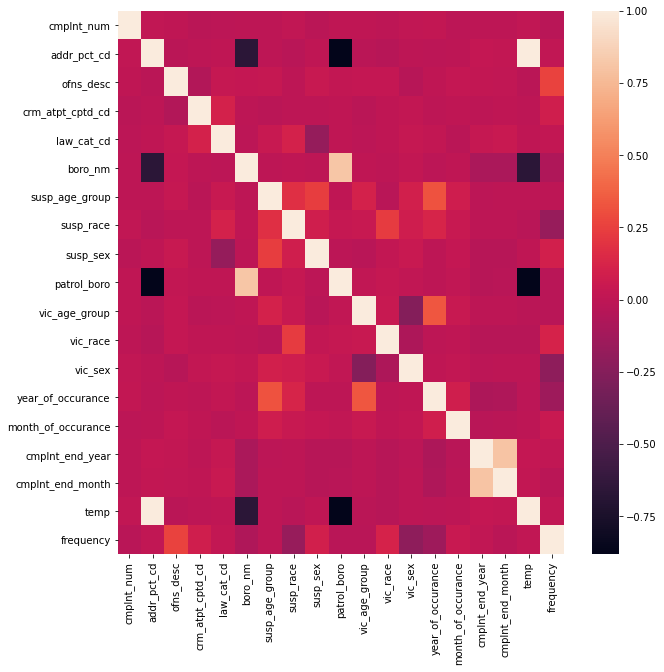

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(df4.corr())

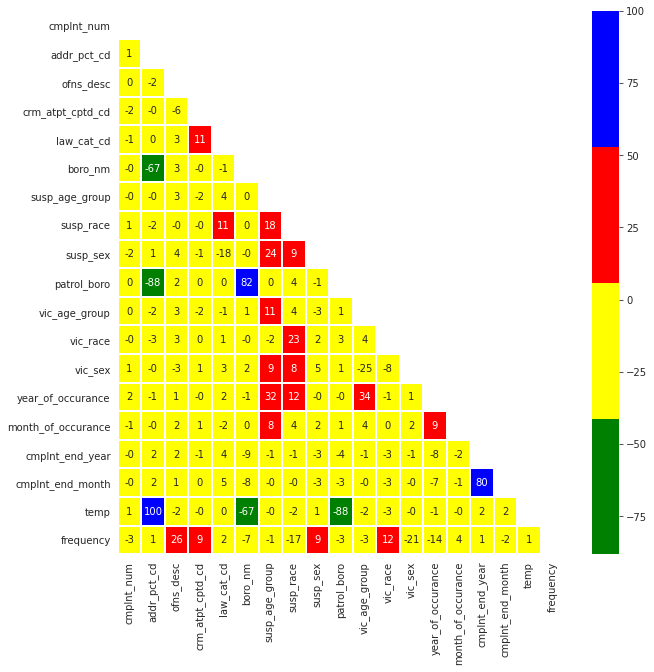

In [61]:
mask=np.zeros_like(df4.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df4.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))